# Pointcloud-to-Graph Voronoi Lifting Tutorial

### Imports and utilities

In [16]:
# With this cell any imported module is reloaded before each cell execution
%load_ext autoreload
%autoreload 2
from modules.data.load.loaders import PointCloudLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    describe_data,
    load_dataset_config,
    load_transform_config,
    plot_pointcloud_voronoi,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the Dataset


Dataset configuration for stanford_bunny:

{'data_domain': 'pointcloud',
 'data_type': 'toy_dataset',
 'data_name': 'stanford_bunny',
 'data_dir': 'datasets/pointcloud/toy_dataset/stanford_bunny'}

Dataset only contains 1 sample:
 - Set with 35947 points.
 - Features dimension: 0



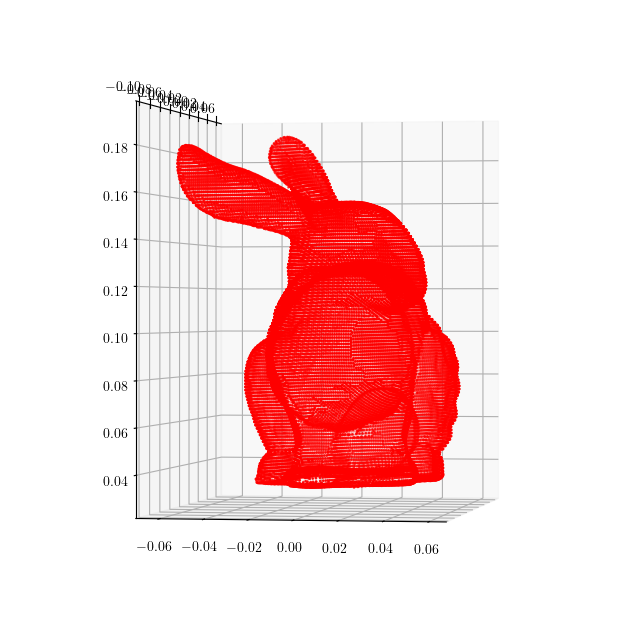

In [31]:
dataset_name = "stanford_bunny"
dataset_config = load_dataset_config(dataset_name)
loader = PointCloudLoader(dataset_config)

dataset = loader.load()
describe_data(dataset)
plot_pointcloud_voronoi(dataset)

## Loading and Applying the Lifting


Transform configuration for pointcloud2graph/voronoi_lifting:

{'transform_type': 'lifting',
 'transform_name': 'VoronoiLifting',
 'support_ratio': 0.005,
 'feature_lifting': 'ProjectionSum'}
Transform parameters are the same, using existing data_dir: /Users/patrykrygiel/Documents/UTWENTE/Projects/challenge-icml-2024/datasets/pointcloud/toy_dataset/stanford_bunny/stanford_bunny/lifting/470379963

Dataset only contains 1 sample:
 - Graph with 35947 vertices and 35947 edges.
 - Features dimensions: [0, 0]



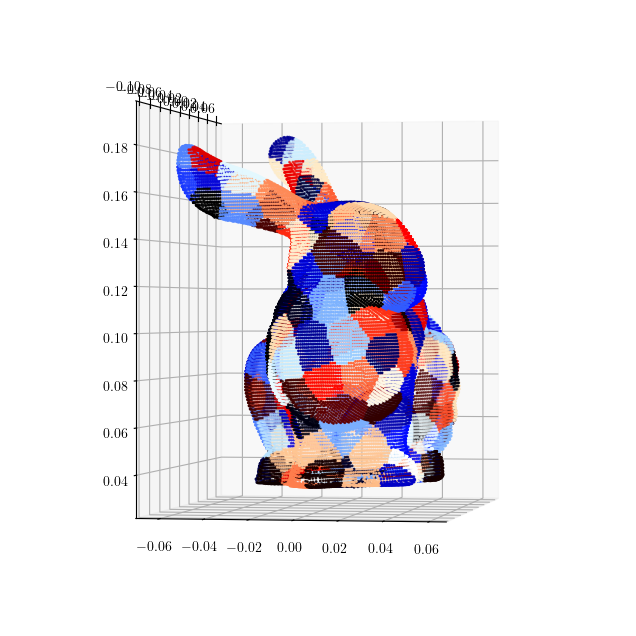

In [30]:
transform_type = "liftings"
transform_id = "pointcloud2graph/voronoi_lifting"
transform_config = {"lifting": load_transform_config(transform_type, transform_id)}

lifted_dataset = PreProcessor(dataset, transform_config, loader.data_dir)
describe_data(lifted_dataset)
plot_pointcloud_voronoi(lifted_dataset)